In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = "NASA-promise-dataset-repository-main/cm1.csv"

In [3]:
df=pd.read_csv(datapath)

In [4]:
df = df[~df.isin(['?']).any(axis=1)]

In [5]:
X =df.drop(["defects"],axis=1)

In [6]:
y = df[["defects"]]

In [7]:
Y_numeric = y.astype(int)

In [8]:
Y_numeric.head()

,defects
0,0
1,1
2,0
3,0
4,0


In [9]:
Y_numeric.values.reshape(1, -1).flatten()

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
Y_numeric[Y_numeric == '?'] = np.nan

In [11]:
X_clean = X[~np.isnan(Y_numeric)]
Y_clean = Y_numeric[~np.isnan(Y_numeric)]

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(Y_numeric)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y_imputed,test_size=0.3,random_state=42)

In [15]:
import tensorflow as tf
from tensorflow.keras import __version__

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {__version__}")

TensorFlow Version: 2.16.1
Keras Version: 3.3.3


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamW', metrics=['accuracy'])

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(x_train, y_train, batch_size=8, epochs=200)

loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy}")

Epoch 1/200


C:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5505 - loss: 0.6427
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9018 - loss: 0.2936
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9113 - loss: 0.2840
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8856 - loss: 0.3314
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9237 - loss: 0.2424
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9043 - loss: 0.2998
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9088 - loss: 0.2820
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9001 - loss: 0.2774
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9013 - loss: 0.2695
Epoch 10/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9010 - loss: 0.2782
Epoch 11/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9164 - loss: 0.2553
Epoch 12/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9018 - lo

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[126   8]
 [ 15   1]]


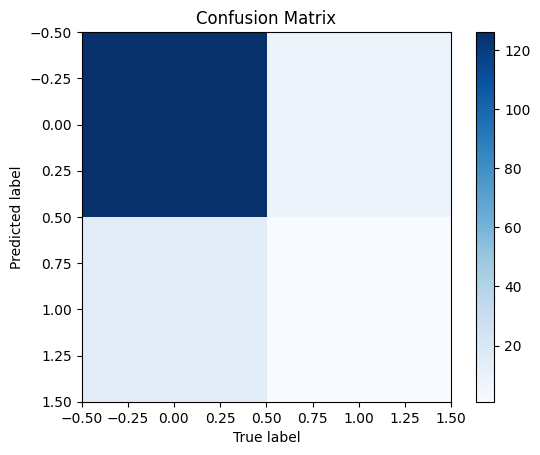

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred = tf.round(y_pred).numpy()
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [18]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       134
         1.0       0.11      0.06      0.08        16

    accuracy                           0.85       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.81      0.85      0.83       150



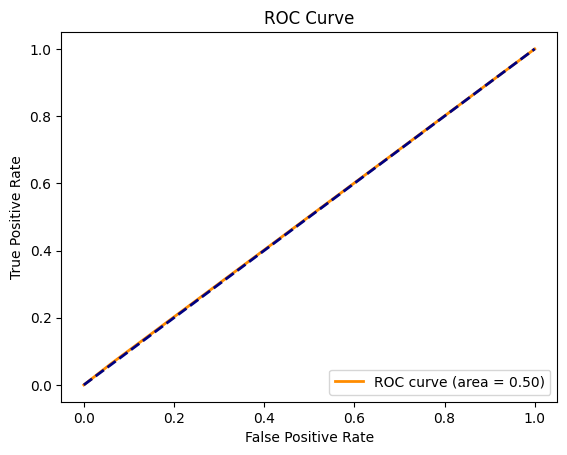

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

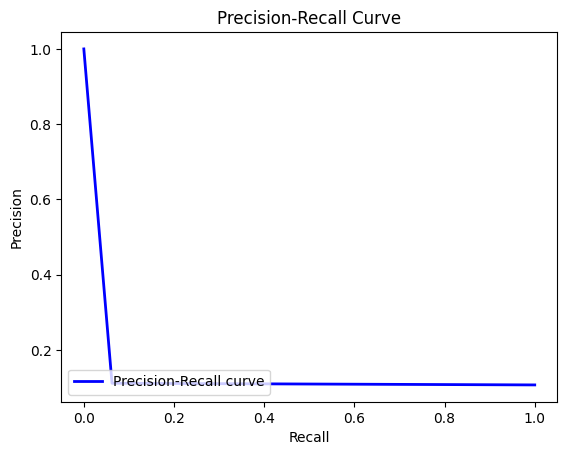

In [20]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()